In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint as print
import json

# USAGOV_BITLY数据集

## 读入数据

注：通过列表生成式

In [8]:
with open("data/bitly.txt", 'r') as f:
    records = [json.loads(line) for line in f]

## 对时区进行计数(1)
by python

In [29]:
from collections import defaultdict

time_zone = [r['tz'] for r in records if 'tz' in r]

def get_counts(sequence):
    # 统计列表中元素出现次数
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

def top_count(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    value_key_pairs.reverse()
    return value_key_pairs[:n]

tz_counts = get_counts(time_zone)
print(top_count(tz_counts))

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]


## 对时区进行计数(2)
by python standard lib

In [27]:
from collections import Counter

time_zone = [r['tz'] for r in records if 'tz' in r]

tz_counts = Counter(time_zone)
tz_counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 对时区进行计数(3)
by pandas

In [72]:
# 通过dict列表生成dataframe
frame = pd.DataFrame(records)
# 输出基本信息
# frame.info()

# tz是索引方法，value_counts获得统计直方图，返回值是一个pd.Series，Series同样有head方法
time_zone = frame.tz
time_zone[time_zone == ""] = "Unknown"
top10 = time_zone.value_counts().head(10)
print(top10)

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 可视化
直接利用pd对象可视化函数

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64


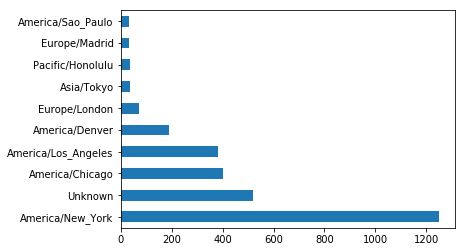

In [81]:
print(top10)

top10.plot(kind="barh",rot=0)
plt.show()

In [116]:
# 去掉空值
sub_frame = frame[frame.a.notnull()]

# sub_frame.a.str返回的是pandas内部StringMethod类型
# np.where方法接受一个判断条件，返回一个满足条件的索引列表
# 当给出额外的两个参数的时候，分别用第二和第三个参数为判断条件为true和False的位置赋值
OS = np.where(sub_frame.a.str.contains("Windows"), "Windows", "Not Windows")

# 按层次进行groupby
by_tz_os = sub_frame.groupby(["tz", OS]).size()

by_tz_os.unstack().fillna(0).sort_values(by="Windows", ascending=False)

,Not Windows,Windows
tz,,
America/New_York,339.0,912.0
America/Chicago,115.0,285.0
Unknown,245.0,276.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Sao_Paulo,13.0,20.0


In [111]:
by_tz_os.sort_values(ascending=False)

tz                                
America/New_York       Windows        912
                       Not Windows    339
America/Chicago        Windows        285
Unknown                Windows        276
America/Los_Angeles    Windows        252
Unknown                Not Windows    245
America/Denver         Not Windows    132
America/Los_Angeles    Not Windows    130
America/Chicago        Not Windows    115
America/Denver         Windows         59
Europe/London          Not Windows     43
Pacific/Honolulu       Windows         36
Asia/Tokyo             Windows         35
Europe/London          Windows         31
America/Sao_Paulo      Windows         20
Europe/Madrid          Windows         19
Europe/Berlin          Windows         19
Europe/Rome            Windows         19
America/Phoenix        Windows         17
Europe/Madrid          Not Windows     16
America/Rainy_River    Windows         15
Europe/Warsaw          Windows         15
America/Sao_Paulo      Not Windows     13